# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [2]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('data/checkins_.csv')
print(df.shape)
print(df.describe())
df.head(5)


(100000, 2)
            latitude      longitude
count  100000.000000  100000.000000
mean       36.886388     -89.396849
std         8.351517      35.579317
min       -45.031162    -159.670833
25%        33.494170    -112.074037
50%        38.646991     -87.743938
75%        40.740389     -75.163789
max        67.631479     174.908056


,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [3]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.1)
%time ms.fit(df.values)

CPU times: user 5min 52s, sys: 5.08 s, total: 5min 57s
Wall time: 5min 58s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

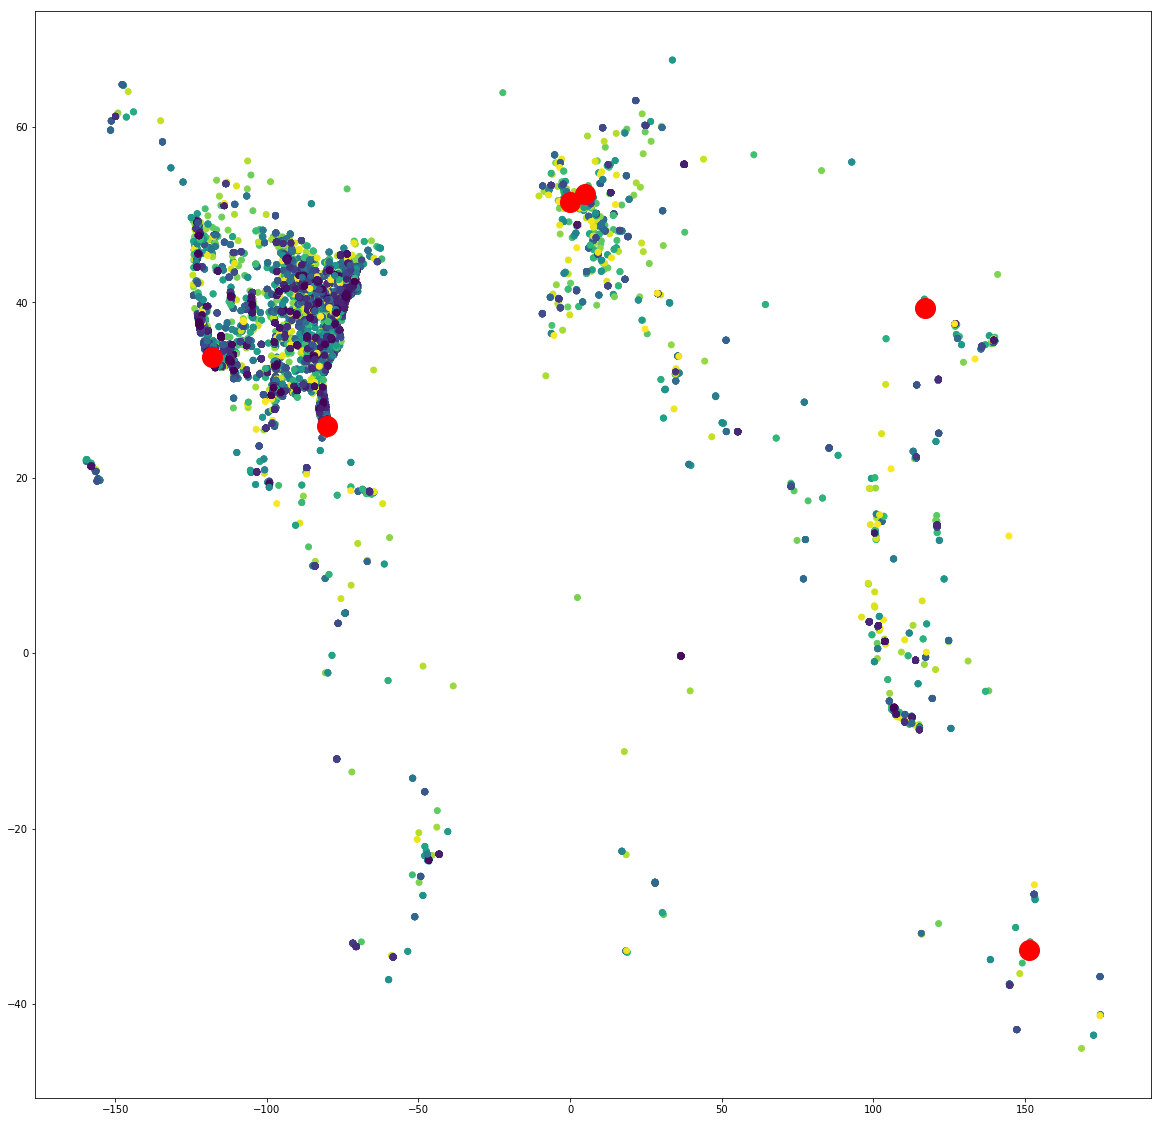

In [4]:
plt.figure(figsize=(20, 20))
plt.scatter(df.values[:,1],df.values[:,0],c=ms.predict(df))
office = np.array([[33.751277, -118.18874],
 [25.867736, -80.324116],
 [51.503016, -0.075479],
 [52.378894, 4.885084],
 [39.366487, 117.036146],
 [-33.868457, 151.205134]])
plt.scatter(office[:,1],office[:,0],c='red',s=400)


###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [5]:
unique, counts = np.unique(ms.labels_, return_counts=True)
cluster_centers = ms.cluster_centers_[unique[counts > 15]]
print(cluster_centers.shape[0])

592


###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [31]:
offices = ['Los Angeles', 'Miami', 'London', 'Amsterdam', 'Beijing', 'Sydney']
import math
def distance(p1, p2):
    return math.sqrt( (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 )

dists = np.zeros((office.shape[0],cluster_centers.shape[0]))

for i in range(0, office.shape[0]):
    for j in range(0 ,cluster_centers.shape[0]):
        dists[i][j] = distance(office[i], cluster_centers[j])
for i in range(len(offices)):
    print("\nБлижайшие оптимальные места для баннеров от офиса в " + offices[i] + " это : \n")
    for j in cluster_centers[np.argsort(dists[i])[:20]]:
        print('Место с координатами',j)
    


Ближайшие оптимальные места для баннеров от офиса в Los Angeles это : 

Место с координатами [  33.80987796 -118.14892381]
Место с координатами [  33.88832534 -118.04892817]
Место с координатами [  33.87298601 -118.36209115]
Место с координатами [  33.97257482 -118.16837067]
Место с координатами [  33.98393587 -118.00740497]
Место с координатами [  33.81730643 -117.89124917]
Место с координатами [  34.06039755 -118.24870903]
Место с координатами [  33.67430266 -117.85878927]
Место с координатами [  34.03548695 -118.43899772]
Место с координатами [  34.13146015 -118.11801181]
Место с координатами [  34.09129753 -117.98038945]
Место с координатами [  34.12740222 -118.35188373]
Место с координатами [  34.16021038 -118.22361657]
Место с координатами [  33.65089599 -117.75207397]
Место с координатами [  34.07507883 -117.81647189]
Место с координатами [  34.19818207 -118.54927681]
Место с координатами [  34.06188557 -117.67178458]
Место с координатами [  33.45162379 -117.64702445]
Место с к

In [54]:
a = np.argsort(np.ravel(dists))
a = a[:592]
a = cluster_centers[np.argsort(np.ravel(dists)[:592]).reshape(1,592)]
a[:,:20]

array([[[  33.80987796, -118.14892381],
        [  33.88832534, -118.04892817],
        [  33.87298601, -118.36209115],
        [  33.97257482, -118.16837067],
        [  33.98393587, -118.00740497],
        [  33.81730643, -117.89124917],
        [  34.06039755, -118.24870903],
        [  33.67430266, -117.85878927],
        [  34.03548695, -118.43899772],
        [  34.13146015, -118.11801181],
        [  34.09129753, -117.98038945],
        [  34.12740222, -118.35188373],
        [  34.16021038, -118.22361657],
        [  33.65089599, -117.75207397],
        [  34.07507883, -117.81647189],
        [  34.19818207, -118.54927681],
        [  34.06188557, -117.67178458],
        [  33.45162379, -117.64702445],
        [  33.88308404, -117.56395783],
        [  34.0050079 , -118.8100893 ]]])

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 